# Atelier 6 : Language Modeling

# 1.	N-Gram


Le package nltk.lm sera utilisé pour l'implementation du modèle de langage   N-gram. La documentation est disponible [ICI](https://www.nltk.org/api/nltk.lm.html). Egalement, des exemples sont disponibles [ICI](https://www.nltk.org/howto/lm.html)


In [1]:
!pip install nltk

On va considerer le corpus de reuters pour entrainer le. Pour ce faire, choisisez une categorie parmi celles disponibles dans le corpus reuters afin de raliser l'entrainement du modèle.



In [1]:

# Recuperation du corpus
import nltk
# nltk.download('all')
from nltk.corpus import reuters

job_news=reuters.raw(reuters.fileids("jobs"))


Relaiser une segmentation des documents du corpus. Commencer au début par une segmentation à base de phrases et realiser pour chacune un nettoyage  en effacant juste les cateres speciaux et la ponctuation. en sortie on doit avoir le vocabulaire du corpus (tous les mots) et la liste des bigrams (une liste de liste telques les sous listes comportes deux mots chacune)/


In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import bigrams


def Segmentation_bigrams(corpus):
  Vocabulary=['<s>','</s>'] # pour les debuts et fins des phrases
  Bigrams=[] #[[mot1,mot2],[mot2,mot3]....]
  Sentences=sent_tokenize(corpus)
  tokenizer = RegexpTokenizer(r'\w+')
  for sentence in Sentences:
    word_tokens = [word.lower() for word in tokenizer.tokenize(sentence)]
    Vocabulary=Vocabulary+word_tokens
    Bigrams=Bigrams+[list(bigrams(pad_both_ends([word for word in word_tokens],n=2)))]
  return Vocabulary,Bigrams

Vocabulary,Bigrams=Segmentation_bigrams(job_news)

In [3]:
Vocabulary

['<s>',
 '</s>',
 'german',
 'industrial',
 'employment',
 'seen',
 'stagnating',
 'the',
 'number',
 'of',
 'workers',
 'employed',
 'in',
 'the',
 'west',
 'german',
 'industrial',
 'sector',
 'stagnated',
 'in',
 'the',
 'last',
 'quarter',
 'of',
 '1986',
 'as',
 'a',
 '50',
 '000',
 'increase',
 'in',
 'overall',
 'employment',
 'benefited',
 'only',
 'the',
 'services',
 'branch',
 'the',
 'diw',
 'economic',
 'institute',
 'said',
 'a',
 'diw',
 'report',
 'added',
 'the',
 'general',
 'downturn',
 'in',
 'the',
 'economy',
 'since',
 'last',
 'autumn',
 'had',
 'had',
 'a',
 'negative',
 'effect',
 'on',
 'the',
 'willingness',
 'of',
 'firms',
 'to',
 'take',
 'on',
 'workers',
 'it',
 'referred',
 'to',
 'a',
 'marked',
 'downturn',
 'in',
 'the',
 'number',
 'of',
 'workers',
 'taken',
 'on',
 'in',
 'the',
 'capital',
 'goods',
 'sector',
 'new',
 'orders',
 'for',
 'manufacturing',
 'industry',
 'goods',
 'have',
 'mostly',
 'fallen',
 'or',
 'stagnated',
 'in',
 'recent',

In [4]:
Bigrams

[[('<s>', 'german'),
  ('german', 'industrial'),
  ('industrial', 'employment'),
  ('employment', 'seen'),
  ('seen', 'stagnating'),
  ('stagnating', 'the'),
  ('the', 'number'),
  ('number', 'of'),
  ('of', 'workers'),
  ('workers', 'employed'),
  ('employed', 'in'),
  ('in', 'the'),
  ('the', 'west'),
  ('west', 'german'),
  ('german', 'industrial'),
  ('industrial', 'sector'),
  ('sector', 'stagnated'),
  ('stagnated', 'in'),
  ('in', 'the'),
  ('the', 'last'),
  ('last', 'quarter'),
  ('quarter', 'of'),
  ('of', '1986'),
  ('1986', 'as'),
  ('as', 'a'),
  ('a', '50'),
  ('50', '000'),
  ('000', 'increase'),
  ('increase', 'in'),
  ('in', 'overall'),
  ('overall', 'employment'),
  ('employment', 'benefited'),
  ('benefited', 'only'),
  ('only', 'the'),
  ('the', 'services'),
  ('services', 'branch'),
  ('branch', 'the'),
  ('the', 'diw'),
  ('diw', 'economic'),
  ('economic', 'institute'),
  ('institute', 'said'),
  ('said', '</s>')],
 [('<s>', 'a'),
  ('a', 'diw'),
  ('diw', 'repor

Pour l'entrainement du modèle  nous utilisons la librairie nltk.lm qui permet de realiser des modèles de langage ngram. La librairie fournit plusieurs modeles d'implementation (MLE, Laplace,Lidstone,.... ) pour calculer les differentes probabilités.

In [5]:
from nltk.lm import Laplace
from nltk.lm import MLE

model = MLE(2)
model.fit(Bigrams, Vocabulary)

Ci-dessous quelques exemples pour l'exploitation du modèle

In [6]:
print(model.counts)


<NgramCounter with 2 ngram orders and 14020 ngrams>


In [7]:
print(model.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 1989 items>


In [8]:
model.counts[['kind']]['of']


2

In [9]:
#recuperer la probabilité d'avoir un terme en fonction d'un contexte
model.score('of','kind'.split())
#ou bien
model.score("of", ["kind"])


1.0

Génération  des termes via le modèle

In [10]:
mots=model.generate(10,text_seed=['kind']) # generation de 10 termes qui suivent "kind"
" ".join(mots)

'of 1986 and coordination agency began compiling unemployment falls in'

Le code precedent retourne une generation aléatoire des mots parmis ceux les plus probables. On peut utiliser un random_seed pour fixer la generation des termes via le modèle

In [11]:
mots=model.generate(10,text_seed=['kind'],random_seed=0)
" ".join(mots)

'of the heavy dependence on its policy appear lower interest'

In [12]:
mots=model.generate(10,text_seed=['french'],random_seed=5)
" ".join(mots)

'growth rate to the rapid job creation measures will however'

In [13]:
mots=model.generate(10,text_seed=['sweden'],random_seed=0)
" ".join(mots)

's seasonally adjusted 64 300 fall slowly as last year'

# 2.	Neural Language Model


Pour concevoir un modèle de langage neuronal , nous considérons un reseau de neurones à trois couche. une couche d’entrée, une couche cachée et une couhe de sortie.

Les mots doivent être dotés d'une structure vectorielle avant de les introduire dans le processus d’apprentissage.

La couche de sortie comportera un vecteur contenant les probabilités des generation des defifferents mots du vocabulaire.

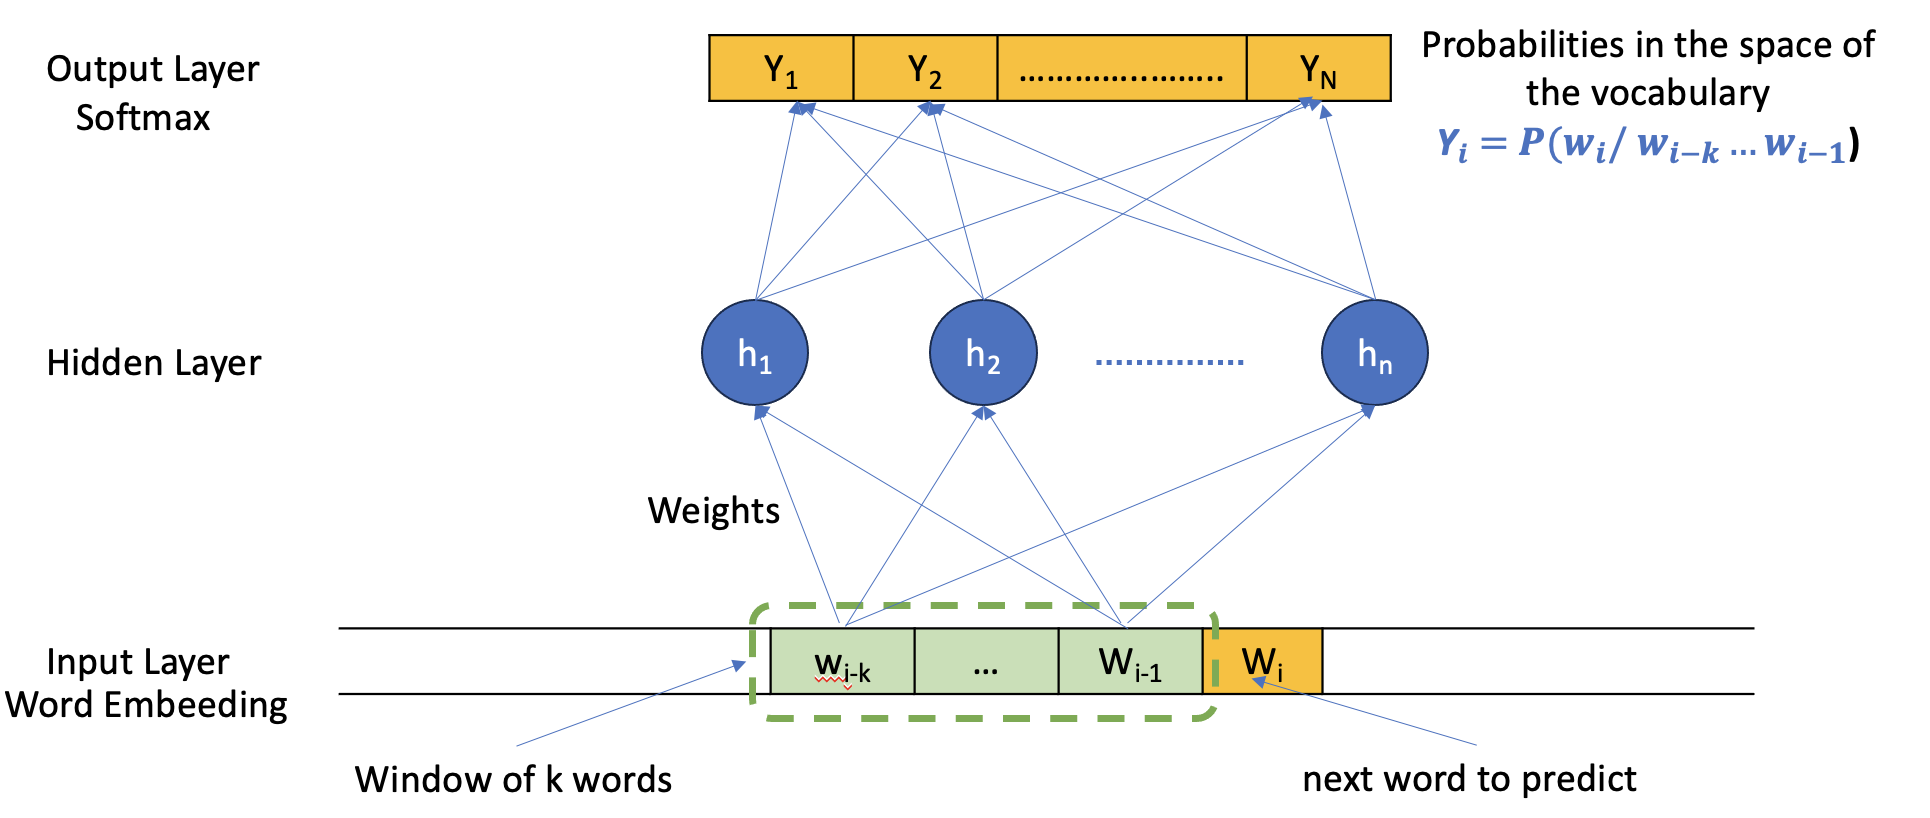

## 2.1 Preparation du dataset d'apprentissage:



Nous consederant toujour le meme datset que la première section.

Pour la recuperation des embeedings, la librairie Gensim fourni une implémentation de l'algorithme Word2Vec :

    *fasttext-wiki-news-subwords-300
    *conceptnet-numberbatch-17-06-300
    *word2vec-ruscorpora-300
    *word2vec-google-news-300
    *glove-wiki-gigaword-50
    *glove-wiki-gigaword-100
    *glove-wiki-gigaword-200
    *glove-wiki-gigaword-300
    *glove-twitter-25
    *glove-twitter-50
    *glove-twitter-100
    *glove-twitter-200

In [17]:
import gensim.downloader
glove_vectors = gensim.downloader.load('word2vec-google-news-300')

[==========----------------------------------------] 21.3% 354.0/1662.8MB downloaded

ContentTooShortError: <urlopen error retrieval incomplete: got only 371139316 out of 1743563840 bytes>

Dans un premier temps nous allons commencer par des inputs de type bigrams.
Recuperer la liste des bigrams crée précédemment et exploiter la dans la generation des vecteurs X et Y avec X[i] et Y[j] coresspondent au bigram [wi,wj], sachant que X[i] est l'embedding du mot wi et yi=1 (les autres yk=0)

In [ ]:
import numpy


'''pour un bigrame <Wi,Wj>, il doit generer le vecteur y=[...0...pj=1,..0...] pour
une entree x[i] aui corrependant à l'embeeding de wi
'''

def data_preparation(corpus):
  Vocabulary,Bigrams=Segmentation_bigrams(corpus) #Assurez vous que Bigrams est une liste de bigrams
  X=[]
  Y=[]
  for lb in Bigrams:
    for bg in lb:
      if bg[0] in glove_vectors and bg[1] in glove_vectors:
        X=X+[glove_vectors[bg[0]]]
        y=numpy.array([0]*len(Vocabulary ))
        y[Vocabulary.index(bg[1])]=1
        Y=Y+[y]
  return X,Y

X,Y=data_preparation(job_news)
print(numpy.array(X).shape)  # Should be (num_samples, num_features)
print(numpy.array(Y).shape)  # Should be (num_samples, num_classes)


## 2.1 Entrainement du modèle:


Le package keras sera utilisé pour l'implementation du langage de modèle neuronal. La documentation est disponible [ICI](https://keras.io/api/)

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Embedding, Flatten, Input


# Create the model

model = Sequential([
    Input(shape=(len(X[0]),)),  # Input layer
    Dense(10, activation='relu'),   # First layer with 10 units
    Dense(len(Vocabulary), activation='softmax')  # Output layer with Softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(numpy.array(X), numpy.array(Y), epochs=500, batch_size=100)

# Evaluate the model (using the same data for simplicity)
loss, accuracy = model.evaluate(numpy.array(X), numpy.array(Y))
print(f'Loss: {loss}, Accuracy: {accuracy}')


De la meme facons aue la premier section, donner le code exploitant le modèle dans la generation du texte à partir d'un mot de départ

In [ ]:
def generate (start,n):
  sentence=""
  next=start
  for i in range(n):
    sentence=sentence+" "+next
    predictions=model.predict(numpy.array([glove_vectors[next]]))
    predictions=predictions.tolist()[0]
    next=Vocabulary[predictions.index(max(predictions))]
  return sentence

generate("employers",10)


# Exercice

## 1.Tri grams

Refaire le meme travail avec le tri-grams